<a href="https://colab.research.google.com/github/gauravrs195/Capstone-1-Play-Store-App-Review-Analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

##Exploring Play Store Data

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

#**Import Playstore Data**

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load data
file_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Modules/Python for data science/EDA Project/Play Store Data.csv'
psd_df= pd.read_csv(file_path)

In [ ]:
#First 5 rows of the play store dataframe
psd_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# getting the last five rows
psd_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
psd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Print the Shape of the Two DataFrames
psd_df.shape

(10841, 13)

In [ ]:
# column names
psd_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
psd_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


##Cleaning of the data

In [ ]:
# Removing the null value and Duplicate present in the data set

In [ ]:
# this function give type, non null value, null value, unique value and non null value %
def playstoreinfo():
  temp = pd.DataFrame(index = psd_df.columns)
  temp['Data Type'] = psd_df.dtypes
  temp['non null value'] = psd_df.count()
  temp['null value'] = psd_df.isnull().sum()
  temp['unique values'] = psd_df.nunique()
  temp['non null value percentage'] = psd_df.isnull().mean()
  return temp
playstoreinfo()

,Data Type,non null value,null value,unique values,non null value percentage
App,object,10841,0,9660,0.000000
Category,object,10841,0,34,0.000000
Rating,float64,9367,1474,40,0.135965
Reviews,object,10841,0,6002,0.000000
Size,object,10841,0,462,0.000000
Installs,object,10841,0,22,0.000000
Type,object,10840,1,3,0.000092
Price,object,10841,0,93,0.000000
Content Rating,object,10840,1,6,0.000092
Genres,object,10841,0,120,0.000000


**Findings**

The number of null values are:
1. **Rating** has 1474 null values which contributes **13.60%** of the data.
2. **Type** has 1 null value which contributes **0.01%** of the data.
3. **Content_Rating** has 1 null value which contributes **0.01%** of the data.
4. **Current_Ver** has 8 null values which contributes **0.07%** of the data.
5. **Android_Ver** has 3 null values which contributes **0.03%** of the data.

#Android Ver - There are 3 null Value

In [ ]:
# Null value in Android Ver column
psd_df[psd_df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# delete Null value in Android Ver column
psd_df = psd_df[psd_df['Android Ver'].notna()]

# New shape of dataframe after deleting null value in android ver columns
psd_df.shape

(10838, 13)

In [ ]:
# checking for NaN values in diiferent columns
psd_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
dtype: int64

#Current Ver - 8 Null value in this columns

In [ ]:
# Null value in Current Ver
psd_df[psd_df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [ ]:
# delete NaN value in Current Ver column
psd_df = psd_df[psd_df['Current Ver'].notna()]

# new shape of dataframe
psd_df.shape


(10830, 13)

In [ ]:
# checking for NaN values in diiferent columns
psd_df.isnull().sum()

App                  0
Category             0
Rating            1470
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

#Type - There is 1 NaN value in this columns

In [ ]:
psd_df[psd_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


The `Type `column have two type of entities, i.e. `Free` and `Paid`. If the type is paid then the price will be printed in `Price` column, else, it will show as '0'. In this case, the price of app is printed as '0', which means the app is of type-free. Hence we can replace this NaN value with Free.

In [ ]:
# Replacing the NaN value in 'Type' column corresponding to row index 9148 with 'Free'
psd_df.loc[9148,'Type'] = 'Free'

In [ ]:
# checking for null values in diiferent columns
psd_df.isnull().sum()

App                  0
Category             0
Rating            1470
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

#Rating - There are 1470 NaN values

In [ ]:
psd_df[psd_df["Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


* The `Rating` column contains 1470 NaN values which approximately 13.5% of the rows in the entire dataset. Deleting all these rows is not good as we will loose large amount of data It impact final quality of the analysis.
* The NaN values will replace it by mean or median of the rest values in the Rating column.

In [ ]:
# Finding Median of all non NaN values of rating column
median_rating = psd_df[~psd_df['Rating'].isnull()]['Rating'].median()
median_rating

4.3

In [ ]:
# Replacing the NaN values in the 'Rating' colunm with its median value
psd_df['Rating'].fillna(value=median_rating, inplace = True)

In [ ]:
#NaN values in each column
psd_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#**Handling duplicates values**


Handling the duplicates in the App column

In [ ]:
# Duplicate values in App column
psd_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

In [ ]:
#deleting the duplicate values from the 'App' column
psd_df.drop_duplicates(subset = 'App',inplace = True)

# shape
psd_df.shape

(9649, 13)

In [ ]:
# Checking whether the duplicates in the 'App' column are removed or not
psd_df[psd_df['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
# We have successfully handled all the duplicate values in the App column.

In [ ]:
psd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9649 non-null   object 
 2   Rating          9649 non-null   float64
 3   Reviews         9649 non-null   object 
 4   Size            9649 non-null   object 
 5   Installs        9649 non-null   object 
 6   Type            9649 non-null   object 
 7   Price           9649 non-null   object 
 8   Content Rating  9649 non-null   object 
 9   Genres          9649 non-null   object 
 10  Last Updated    9649 non-null   object 
 11  Current Ver     9649 non-null   object 
 12  Android Ver     9649 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [ ]:
#we should assign correct data type to each column to handle errors

Changing the data type of last updated column from string to date time

In [ ]:
psd_df['Last Updated'] = pd.to_datetime(psd_df['Last Updated'])

psd_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
#Changing the datatype of the Price column from string to float.

In [ ]:
psd_df['Price'].value_counts()

0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

To convert this column from string to float, we must first drop the $ symbol from the all the values. Then we can assign float datatype to those values.

In [ ]:
# Creating a function remove-dollar which dropps the $ symbol if it is present and returns the output which is of float datatype.
def remove1(val):
  if '$' in val:
   return float(val[1:])
  else:
    return float(val)

In [ ]:
# The drop_dollar funtion applied to the price column
psd_df['Price'] = psd_df['Price'].apply(lambda x: remove1(x))

In [ ]:
psd_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
psd_df[psd_df['Price'] != 0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up


changing the data type of installs from string to integer

In [ ]:
psd_df['Installs'].value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

We need to remove '+', ',', symbol from all the entities, to convert Installs column from string datatype to integer datatype

In [ ]:
# Creating a function convert_plus which drops the '+' symbol if it is present and returns the output which is of integer datatype.
def remove_plus(val):
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[::-1])
    return new1
  else:
    return int(val)

In [ ]:
# the remove_plus function applied to the dataframe
psd_df['Installs'] = psd_df['Installs'].apply(lambda x: remove_plus(x))

In [ ]:
psd_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


changing the data type of size column from string to int and also converting the values in kB to MB

In [ ]:
psd_df['Size'].value_counts()

Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

Values in the Size column contains data with different units. 'M' for MB and 'k' for KB. Convert all the values to a single unit. In this case, we will convert all the units to MB.

In [ ]:
def kb_to_mb(val):
  try:
    if "M" in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024,4)
    else:
      return val
  except:
    return val

In [ ]:
# The kb_into_mb funtion applied to the size column
psd_df['Size'] = psd_df['Size'].apply(lambda x : kb_to_mb(x))

In [ ]:
psd_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


Replacing the Varies with device value with Nan.

In [ ]:
psd_df['Size'] = psd_df.Size.replace('Varies with device',np.NaN)

converting into float

In [ ]:
psd_df['Size'] = psd_df['Size'].apply(lambda x: float(x))

It will be better to drop the Rows of the column Size having Nan values, becuase it will be not a better idea to replace those value with mean or mode since, the size of some apps would be too large and some of them too small.

In [ ]:
#changing data type of reviews column from string to integer

In [ ]:
psd_df['Reviews'] = psd_df['Reviews'].astype(int)
psd_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
psd_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9649.000000,9.649000e+03,8422.000000,9.649000e+03,9649.000000
mean,4.192476,2.168145e+05,20.413556,7.785378e+06,1.100079
std,0.496528,1.832255e+06,21.833485,5.378557e+07,16.860857
min,1.000000,0.000000e+00,0.008300,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.944500e+04,28.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


#**EXPLORING USER REVIEWS DATA**

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Modules/Python for data science/EDA Project/User Reviews.csv'

In [ ]:
ur_df = pd.read_csv(file_path)

In [ ]:
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
ur_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
ur_df.shape

(64295, 5)

In [ ]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


## **Handling the NaN values in the User reviews dataframe**

In [ ]:
# Finding the total no of NaN values in each column.
ur_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
# checking the NaN values in 'Translated_Review' column
ur_df[ur_df['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


Total 26868 rows contains NaN values in Translated_Review column. Those apps which don't have a review (NaN value instead) also NaN values in the columns Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity in the majority of the cases.

Lets check if there are any exceptions.

In [ ]:
ur_df[ur_df['Translated_Review'].isnull() & ur_df['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In the few exceptional cases where the values of remaining columns are non null for null values in the translated_Review column, there seems to be errors. This is because the Sentiment, sentiment ploarity and sentiment subjectivity of the review can be determined if and only if there is a corresponding review.
Hence these values are wrong and can be deleted altogather.

In [ ]:
# deleting row contains NaN values
ur_df = ur_df.dropna()

In [ ]:
# shape after deleting row
ur_df.shape

(37427, 5)

In [ ]:
# inspect sentiment column
ur_df['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

The values in the `Sentiment_Polarity and Sentiment_Subjectivity`looks correct.

Now We can examine this data flow and create user-friendly visuals.

# **Data Visualization on play store data:**

In [ ]:
# Top 10 installed apps in any category

In [ ]:
def findtop10incategory(str):
  str = str.upper()
  top10 = psd_df[psd_df['Category'] == str]
  top10apps = top10.sort_values(by= 'Installs',ascending = False).head(10)
  plt.figure(figsize=(15,6),dpi=100)
  plt.title('Top 10 Installed Apps',size = 20)
  graph = sns.barplot(x=top10apps.App,y = top10apps.Installs,palette='icefire')
  graph.set_xticklabels(graph.get_xticklabels(), rotation = 45, horizontalalignment= 'right')

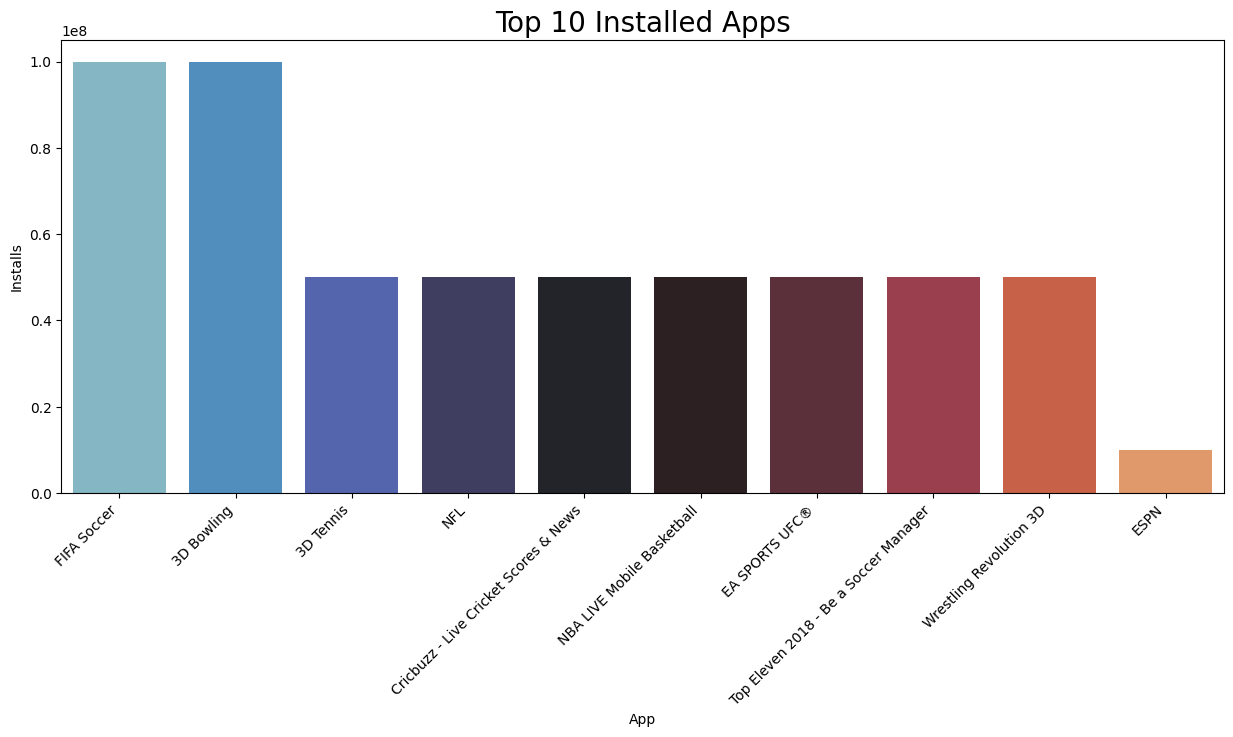

In [ ]:
findtop10incategory('Sports')

From the above graph we can see that in the Sports category FIFA Soccer and 3D Bowling has the highest installs. In the same way we by passing different category names to the function, we can get the top 10 installed apps.

In [ ]:
# Distribution of paid apps and free apps

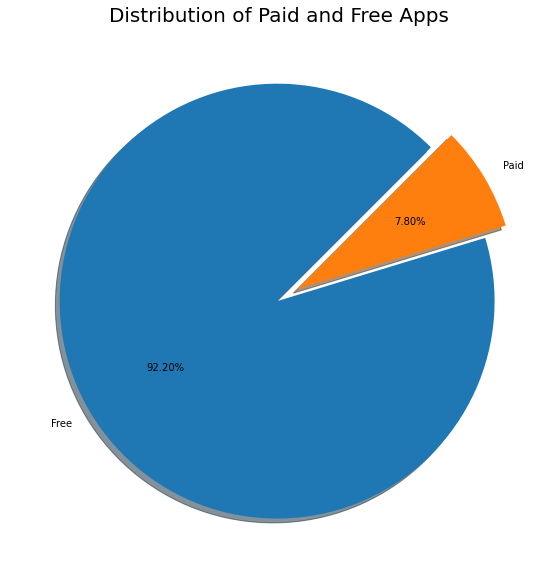

In [ ]:
x = psd_df.Type.value_counts()
label = ['Free','Paid']

plt.figure(figsize=(15,10))
plt.pie(x,labels = label,autopct="%1.2f%%",shadow=True, explode=[0.01,0.1], startangle=45)
plt.title('Distribution of Paid and Free Apps',size = 20,loc = 'center')
plt.show()

Free apps in playstore are **92.20%** and Paid apps in playstore are **7.80%**

In [ ]:
# Top Categories Apps in Google Playstore

In [ ]:
psd_df.groupby('Category')["App"].count().sort_values(ascending=False)

Category
FAMILY                 1829
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: App, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


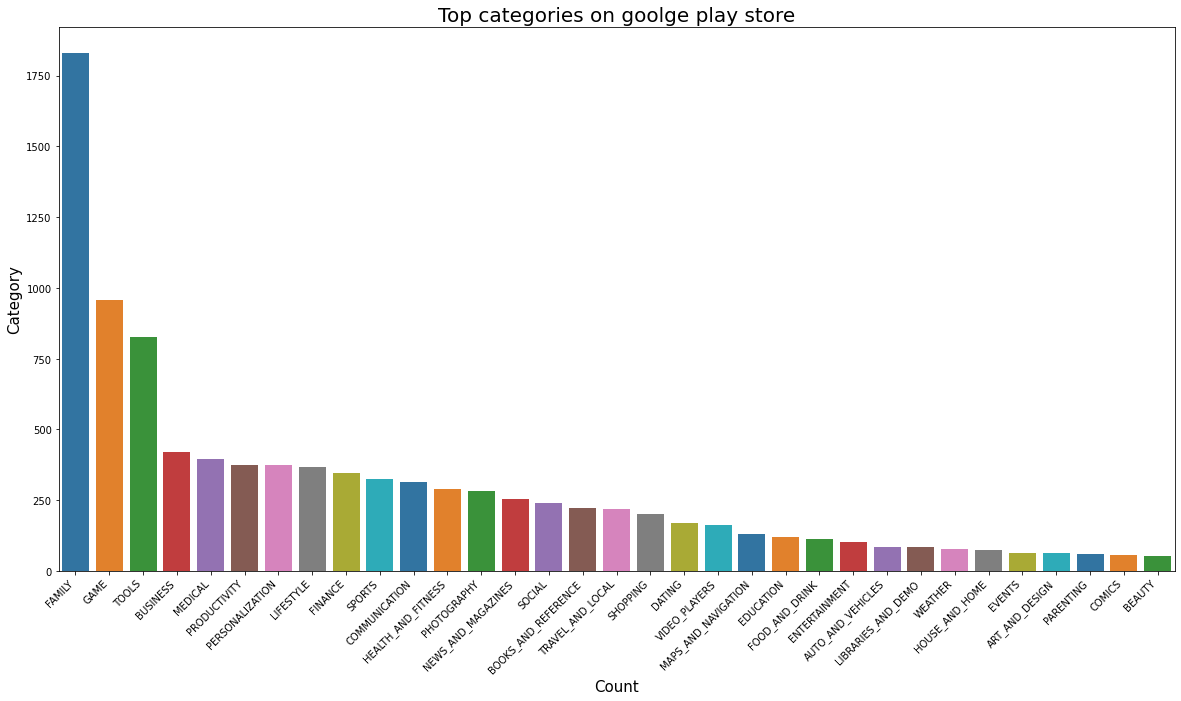

In [ ]:
x = psd_df['Category'].value_counts()
y = psd_df['Category'].value_counts().index
plt.figure(figsize=(20,10))
graph = sns.barplot(y,x, palette = 'tab10')
plt.ylabel('Category',size = 15)
plt.xlabel('Count', size = 15)
graph.set_title("Top categories on goolge play store", fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

**Findings:**

So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore most of the apps are under` FAMILY & GAME` category and least are of `EVENTS & BEAUTY` Category.

In [ ]:
# Which apps have  the highest number of review?

Text(0, 0.5, 'Number of user review')

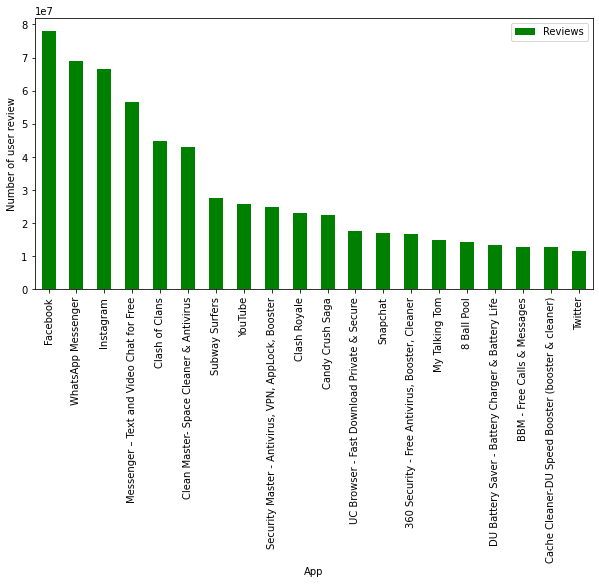

In [ ]:
psd_df.groupby('App')[['Reviews','App']].sum().nlargest(20,['Reviews']).plot.bar(figsize = (10,5),color= 'green')#.invert_xaxis()
plt.ylabel('Number of user review')

Top 20 apps with the highest number of review

Facebook has the highest number of user review

In [ ]:
# which app's have maximum number of installs in any category?

In [ ]:
highest_installs = psd_df.groupby('Category')[['Installs']].sum().sort_values(by='Installs')#,ascending = False)
highest_installs.head()

,Installs
Category,
EVENTS,15969048
BEAUTY,27196015
PARENTING,31521002
MEDICAL,38175366
COMICS,44981006


Text(0.5, 0, 'App categories')

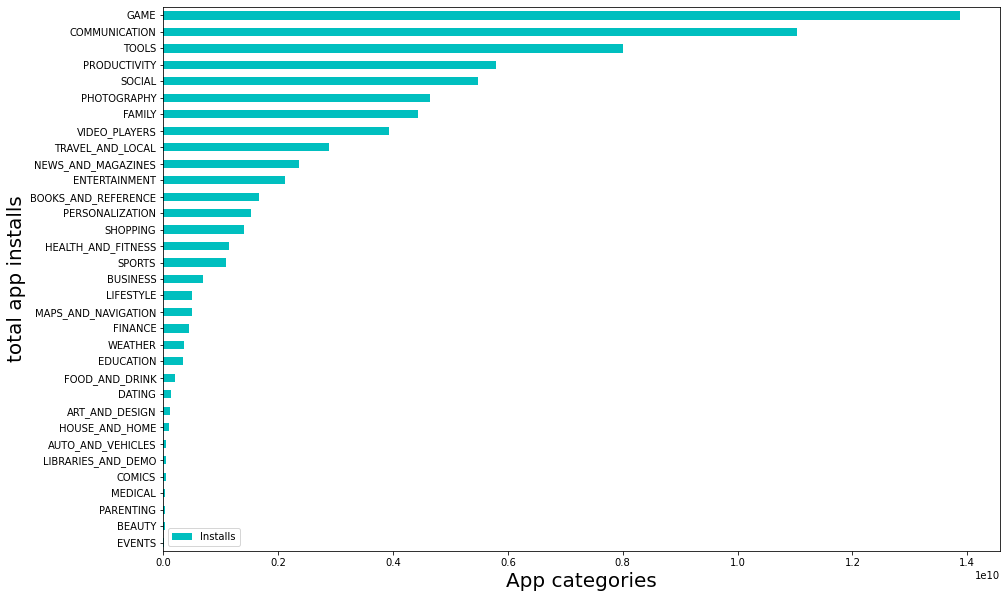

In [ ]:
highest_installs.plot.barh(figsize=(15,10),color='c',)
plt.ylabel('total app installs', fontsize = 20)
plt.xlabel('App categories',fontsize= 20)

This tells us the category of apps that has the maximum number of installs. The `Game,` `Communication and Tools` categories has the highest number of installs compared to other categories of apps.

In [ ]:
#Top 10 expensive apps in the play store

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37666 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24456 missing from current font.
  font.set_te

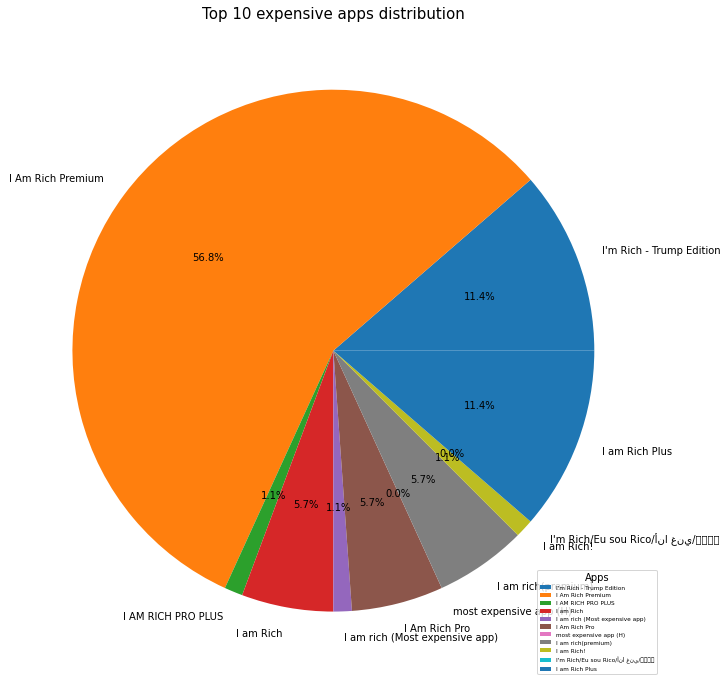

In [ ]:
top10paidapps = psd_df[psd_df['Type'] == 'Paid'].sort_values(by='Price',ascending = False).head(11)

plt.figure(figsize=(15,12))
plt.pie(top10paidapps.Installs, explode=None,labels = top10paidapps.App, autopct='%1.1f%%',startangle=0)
plt.title('Top 10 expensive apps distribution', size = 15)
plt.legend(top10paidapps.App, 
           loc = 'lower right', 
           title = 'Apps', 
           fontsize = 'xx-small');

**Findings:** 

From the above graph we can interprete that the **I am Rich Premium** app is the **most expensive app** in the play_store.

# **Data visualization on User reviews**

In [ ]:
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


# Percentage of Review Sentiments

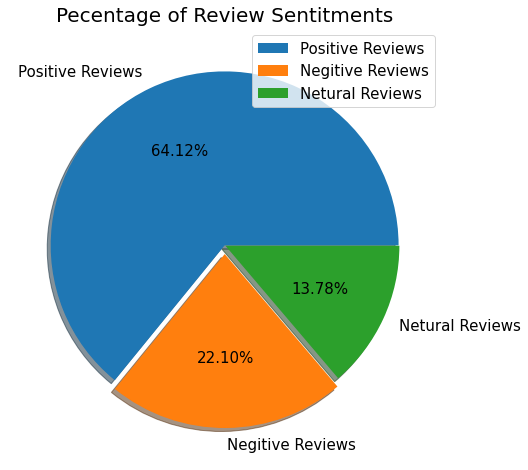

In [ ]:
counts = list(ur_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negitive Reviews', 'Netural Reviews'
matplotlib.rcParams['font.size']= 15
matplotlib.rcParams['figure.figsize'] = (8,8)
plt.pie(counts, labels=labels, explode = [0,0.05,0.005], shadow = True, autopct = '%.2f%%')
plt.title('Pecentage of Review Sentitments', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

**Findings:**
1. Positive reviews are **64.12%**
2. Negative reviews are **22.10%**
3. Neutral reviews are **13.78%**

In [ ]:
# Positive review
positive_review = ur_df[ur_df['Sentiment'] == 'Positive']
positive_review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


Text(0.5, 1.0, 'Top 20 positive reviews apps')

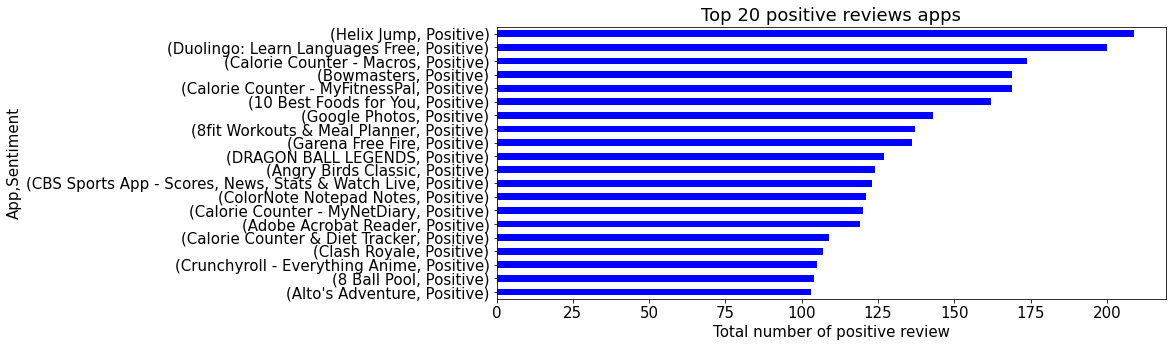

In [ ]:
positive_review.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(12,5),color ='b').invert_yaxis()
plt.xlabel('Total number of positive review')
plt.title('Top 20 positive reviews apps')

It is clear that Helix jump as max no. of positive review

In [ ]:
# negative review
negative_review = ur_df[ur_df['Sentiment'] == 'Negative']
negative_review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


Text(0.5, 1.0, 'Top 20 negitive reviews apps')

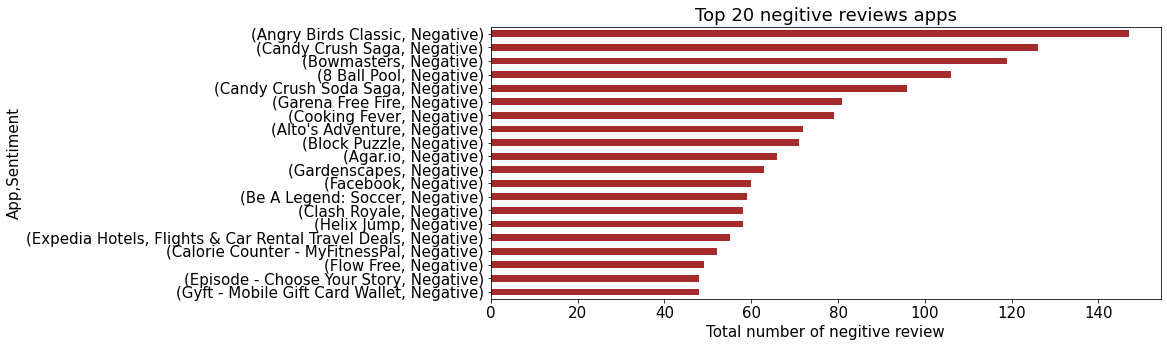

In [ ]:
negative_review.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(12,5),color ='brown').invert_yaxis()
plt.xlabel('Total number of negitive review')
plt.title('Top 20 negitive reviews apps')

In [ ]:
# It is clear that Angry Birds Classic has got highest negative reviews

#**Conclusion**
In the initial phase, we focused more on the problem statements and data cleaning, in order to ensure that we give them the best results out of our analysis.

* In the Sports category FIFA Soccer and 3D Bowling has the highest number of installs.
*   Percentage of free apps = 92.20%

*   Maximum apps in the playstore are from Family category
*   Category with the highest number of installs: Game

*   Most popular app in the Play Store based on the number of reviews: Facebook
*   I am Rich Premium app is the most expensive app in the play_store.

*  Overall percentage of review sentiment in which Positive sentiment count is 64%, Negative 22% and Neutral 14%.

*   Helix Jump has the highest number of positive reviews
*   Angry Birds Classic has the highest number of negative reviews.

#**Summary**

Play Store App Review Analysis project is done by me. In this project we get 2 different csv file as an input. The csv files are playstore app.csv and user review.csv

This is my first EDA project. I made this project individually. In this project there are two csv file first csv file contains apps data and second csv file contains data of user review. I started this project from importing liabraries then import playstore app csv file. First I performed data cleaning on play store data. Handling null values in columns(Android ver, Type, Current ver and rating). Removing duplicates values from App column, chaning the datatype of columns(Last updated, Price, Installs, size, Reviews). Remove '+',  ',' , '$' sign from data set. After performed Data cleaning on play store app csv file, import second csv file(user review). Handing null value in data set.

I started plotting pie chart, bar graph with the help of this graph I show result in this project.